In [54]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.io import fits
from photutils.aperture import aperture_photometry
from photutils.aperture import CircularAperture

import os
homedir=os.getenv('HOME')

In [50]:
#display psf, GALFIT output parameters

psf = fits.getdata(homedir+'/psf_test/NGC5719-custom-psf-W3.fits.fz',header=True)
psf_im = psf[0]
psf_header = psf[1]

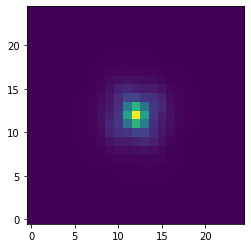

In [93]:
plt.imshow(psf_im[150:175,150:175],origin='lower')
#plt.imshow(psf_im,origin='lower')

In [94]:
psf_output=fits.open(homedir+'/psf_test/psf-galfit-out.fits')
psf_output[2].header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                  300 / Length of data axis 1                          
NAXIS2  =                  300 / Length of data axis 2                          
OBJECT  = 'model   '           / Component type                                 
COMMENT ========== GALFIT Input Parameters ==========                           
INITFILE= 'VFID6056-NGC4289-galfit.input.1Comp' / GALFIT input file             
DATAIN  = '/Users/k215c316/psf_test/NGC5719-custom-psf-W3.fits.fz' / Input data 
SIGMA   = 'none    '           / Input sigma image                              
PSF     = '        '           / Convolution PSF and kernel                     
CONSTRNT= 'none    '           / Parameter constraint file                      
MASK    = 'none    '        

-----

In [97]:
#aperture photometry
enc_flux = np.zeros(1000)
radii=np.linspace(1,300,1000)

for i in range(1000):
    aperture=CircularAperture((psf_im.shape[0]/2,psf_im.shape[1]/2),r=radii[i])
    table = aperture_photometry(psf_im,aperture)
    enc_flux[i] = table['aperture_sum']

(0.0, 90.0)

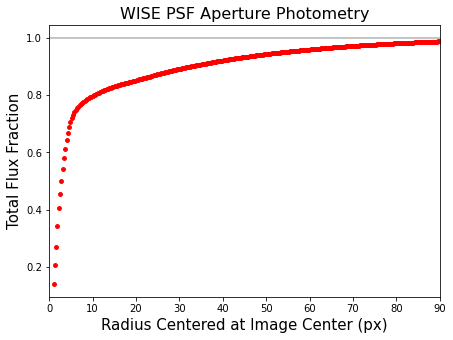

In [98]:
plt.figure(figsize=(7,5))
plt.scatter(radii,enc_flux,color='red',s=15)
plt.axhline(1,color='black',alpha=0.3)
plt.xlabel('Radius Centered at Image Center (px)',fontsize=15)
plt.ylabel('Total Flux Fraction',fontsize=15)
plt.title('WISE PSF Aperture Photometry',fontsize=16)

plt.xlim(0,90)